In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [2]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation = 'relu'))
#model.add(BatchNormalization())
#model.add(Conv2D(16, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 128)               3936384   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,937,409
Trainable params: 3,937,409
Non-trainable params: 0
______________________________________________

In [3]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
training_set = train_datagen.flow_from_directory(directory=r'C:\Users\HP.DESKTOP-5IHNLMQ\Desktop\Python Course\Dataset\train',
                                                target_size=(64,64),
                                                batch_size=8,
                                                class_mode='binary')

val_set = val_datagen.flow_from_directory(directory=r'C:\Users\HP.DESKTOP-5IHNLMQ\Desktop\Python Course\Dataset\val',
                                         target_size=(64,64),
                                         batch_size=8,
                                         class_mode='binary')

Found 79 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [8]:
history = model.fit_generator(training_set, 
                   steps_per_epoch=10,
                   epochs=25,
                   validation_data=val_set,
                   validation_steps=2)

C:\Users\HP.DESKTOP-5IHNLMQ\AppData\Local\Temp\ipykernel_2144\3444021164.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_set,


Epoch 1/25
10/10 [==============================] - 12s 1s/step - loss: 0.7011 - accuracy: 0.5949 - val_loss: 0.7876 - val_accuracy: 0.5000
Epoch 2/25
10/10 [==============================] - 12s 1s/step - loss: 0.6297 - accuracy: 0.5949 - val_loss: 0.5594 - val_accuracy: 0.6875
Epoch 3/25
10/10 [==============================] - 11s 1s/step - loss: 0.4420 - accuracy: 0.7595 - val_loss: 0.6909 - val_accuracy: 0.7500
Epoch 4/25
10/10 [==============================] - 11s 1s/step - loss: 0.3149 - accuracy: 0.9494 - val_loss: 0.6693 - val_accuracy: 0.7500
Epoch 5/25
10/10 [==============================] - 11s 1s/step - loss: 0.3993 - accuracy: 0.7848 - val_loss: 0.5378 - val_accuracy: 0.6875
Epoch 6/25
10/10 [==============================] - 12s 1s/step - loss: 0.2895 - accuracy: 0.8734 - val_loss: 0.4644 - val_accuracy: 0.8125
Epoch 7/25
10/10 [==============================] - 12s 1s/step - loss: 0.2274 - accuracy: 0.9241 - val_loss: 0.7202 - val_accuracy: 0.7500
Epoch 8/25
10/10 [==

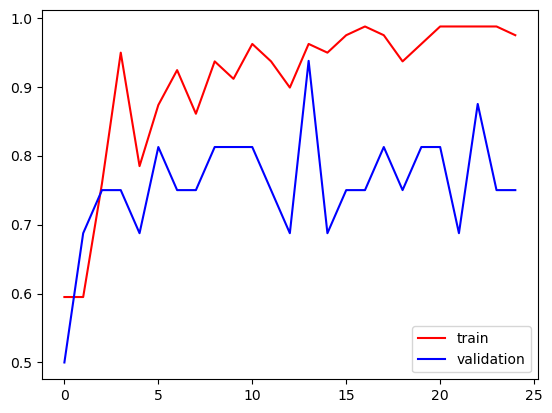

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

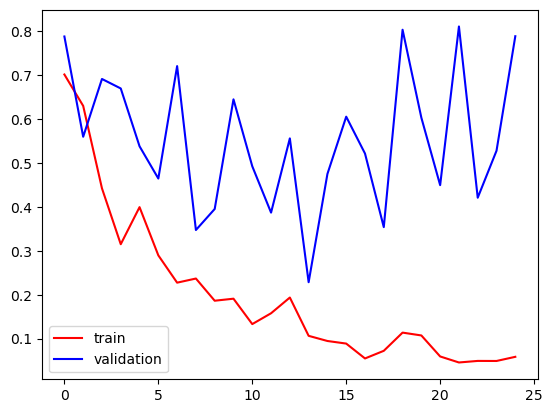

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [11]:
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('model.h5')
print('saved model to disk')

saved model to disk
